# Simple linear regression

* We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression.
* We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import numpy as np
sns.set()
raw_data = pd.read_csv('salary.csv')

### examining data
* Finding missing values
* Droping missing values

In [2]:
raw_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [4]:
raw_data.shape

(514, 11)

there is one missing values in the column salary

Droping missing values

In [5]:
raw_data.dropna(inplace=True)

### splitting data 

* splitting data
* examining the training data


In [6]:
train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=24)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 297 to 419
Data columns (total 11 columns):
salary         410 non-null float64
exprior        410 non-null int64
yearsworked    410 non-null int64
yearsrank      410 non-null int64
market         410 non-null float64
degree         410 non-null int64
otherqual      410 non-null int64
position       410 non-null int64
male           410 non-null int64
Field          410 non-null int64
yearsabs       410 non-null int64
dtypes: float64(2), int64(9)
memory usage: 38.4 KB


### visualizing
* Histograms
* scatterplot

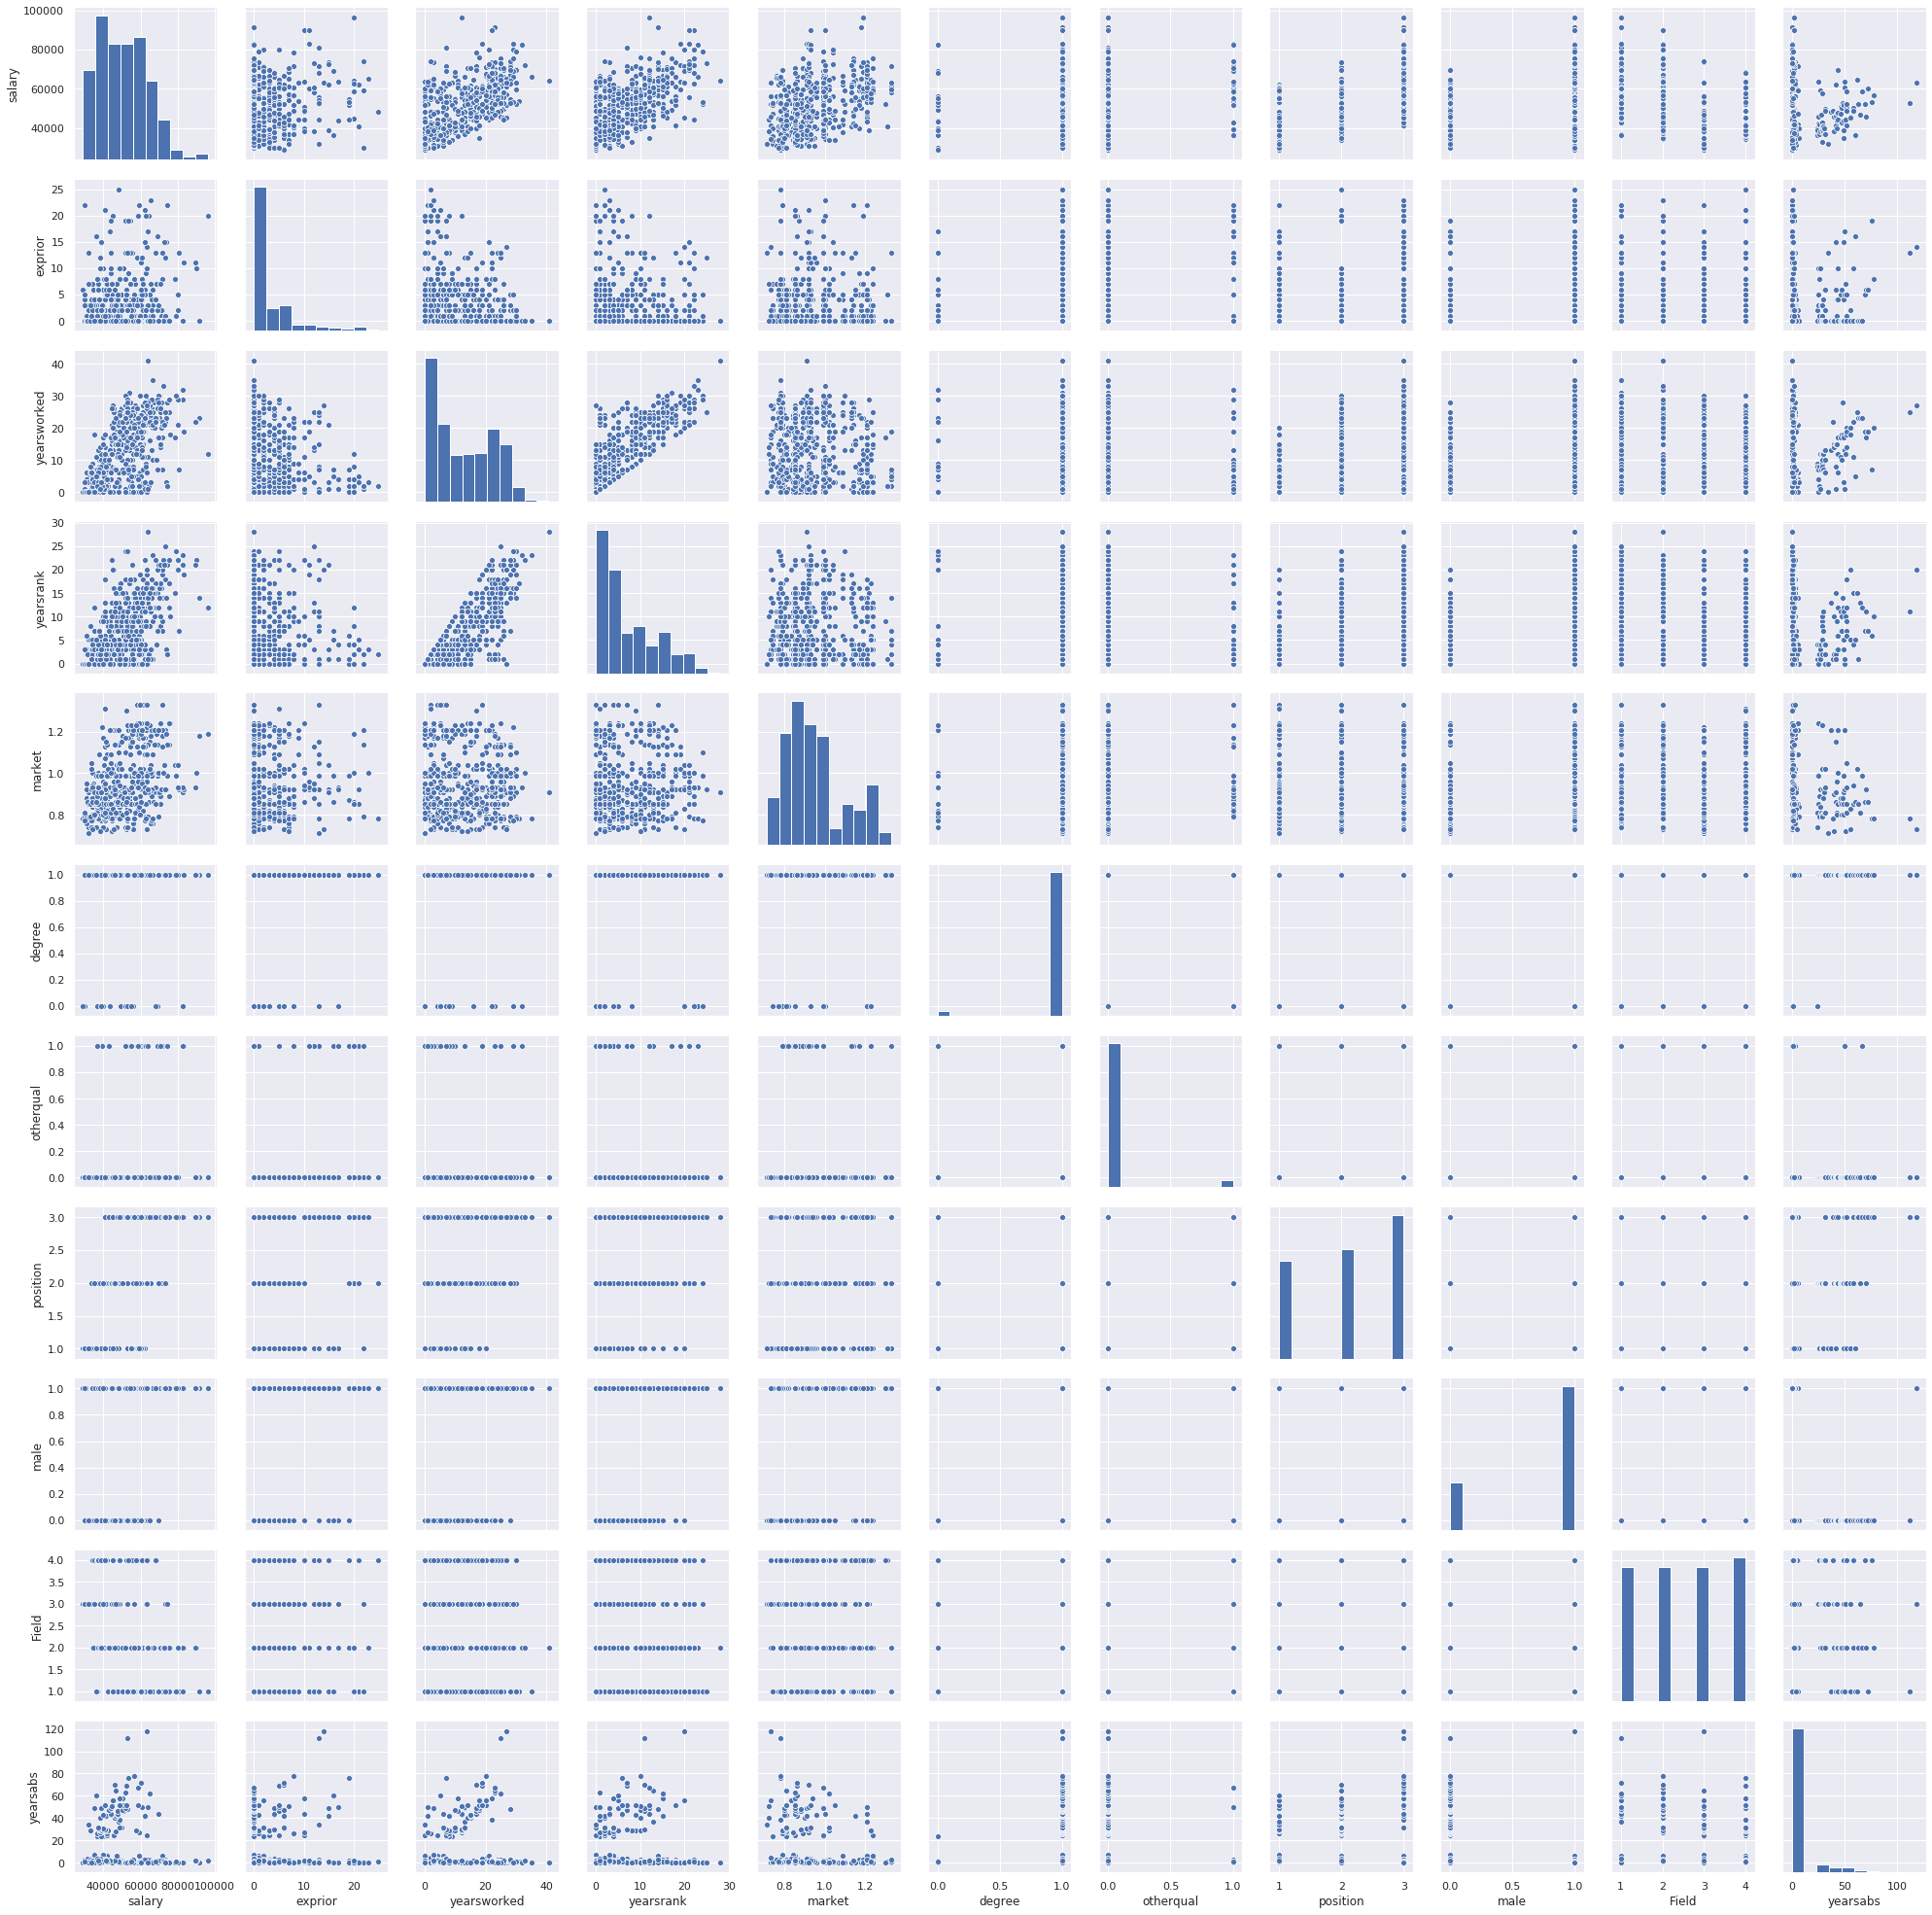

In [7]:
sns.pairplot(raw_data)
plt.show()

the above correlation pairplot shows that the is linear relationship between salary and years worked.

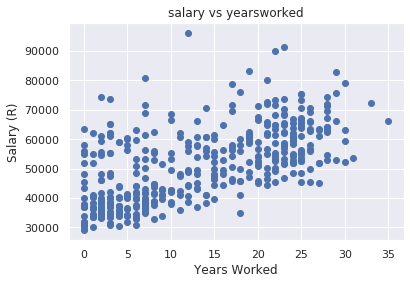

In [8]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
plt.title('salary vs yearsworked')
plt.xlabel('Years Worked')
plt.ylabel('Salary (R)')
plt.show()

In [9]:
# finding outliers for train_data
first_quart,sec_quart = train_data.salary.quantile([0.25,0.75])
iqt = sec_quart - first_quart
iqtr = iqt * 1.5
low_value = first_quart - iqtr
high_value = sec_quart + iqtr
print('lower outlier =',low_value,'higher outlier', high_value)

# finding outliers for test_data
firs_quat,sec_quat = test_data.salary.quantile([0.25,0.75])
iq = sec_quat - firs_quat
iqt = iq * 1.5
low_valu = firs_quat - iqt
high_valu = sec_quat + iqt
print('lower outlier =',low_valu,'higher outlier', high_valu)

lower outlier = 8902.89941125 higher outlier 91800.50098124999
lower outlier = 14946.0 higher outlier 83930.0


In [10]:
train_data = train_data[train_data.salary < 91800.50098124999]
test_data = test_data[test_data.salary < 83930.0]

### 2.Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [11]:
from statsmodels.formula.api import ols
model = ols(formula='salary ~ yearsworked', data=train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     267.9
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           1.24e-46
Time:                        15:16:43   Log-Likelihood:                -4339.4
No. Observations:                 409   AIC:                             8683.
Df Residuals:                     407   BIC:                             8691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.978e+04    841.678     47.267      0.000    3.81e+04    4.14e+04
yearsworked   857.1519     52.364     16.369      0.000     754.214     960.090
==============================================================================
Omnibus:                       49.545   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.126
Skew:                           0.928   Prob(JB):                     1.19e-14
Kurtosis:                       3.565   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

In [12]:
# constant and x_value
print(model.params)

Intercept      39783.729851
yearsworked      857.151893
dtype: float64


In [13]:
dicti = {'yearsworked': [4]}
data = pd.DataFrame(dicti)
pred = model.predict(data)
pred

0    43212.337423
dtype: float64

What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

The model predicts the dependent variable. 38.4% of the variability or differences in salary can be explained by the variabilty of years worked

### 3.What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

salary = 855.6879*x_train + 39915.342182
The unstandardized coefficient of model tells me that a person with zero years worked earns a salary of R39920

### 4.What do the 95% confidence intervals [0.025, 0.975] mean?

it means the model is 95% confident that the mean of salaries is between R38200 and	R41600

### 5.Calculate the expected salary for someone with 12 years’ work experience.

In [14]:
dicti = {'yearsworked': [12]}
data = pd.DataFrame(dicti)
print('12years worked experience salary',model.predict(data))

12years worked experience salary 0    50069.552567
dtype: float64


### 6.Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [15]:
dic = {'yearsworked': [80]}
dataa = pd.DataFrame(dic)
print('12years work experience salary',model.predict(dataa))

12years work experience salary 0    108355.881293
dtype: float64


In [16]:
train_pred = model.predict(train_data)
train_pred

297    59498.223390
366    59498.223390
84     45783.793102
261    60355.375283
128    50069.552567
           ...     
402    39783.729851
344    65498.286642
192    55212.463925
388    40640.881744
419    44926.641209
Length: 409, dtype: float64

the problem about model is that it does not have yearsworked limit, it can predict 80 years work experience

### 7.We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [17]:
raw_data.corr()['salary']

salary         1.000000
exprior        0.119989
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
degree         0.044554
otherqual      0.167137
position       0.702122
male           0.361564
Field         -0.499316
yearsabs      -0.069630
Name: salary, dtype: float64

#### employee characteristics that might influence their salary
* position
* years rank
* market

#### Now fit your model to your test set. DO NOT BUILD A NEW MODEL ON THE TEST SET! Simply use your existing, model, to predict salaries in the test set.

In [18]:
model.predict(test_data)

502    49212.400674
286    60355.375283
31     42355.185530
334    63783.982855
425    39783.729851
           ...     
205    60355.375283
423    43212.337423
448    45783.793102
82     41498.033637
358    60355.375283
Length: 102, dtype: float64

### 8.How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [19]:
pred_train = model.predict(train_data)
pred_test = model.predict(test_data)
rmse_train = sqrt(mean_squared_error(train_data.salary, pred_train))
rmse_test = sqrt(mean_squared_error(test_data.salary, pred_test))
print('RMSE Train', rmse_train)
print("RMSE Test", rmse_test)
print("difference between training and test is", rmse_train - rmse_test)

RMSE Train 9806.154861881741
RMSE Test 8816.572916983425
difference between training and test is 989.5819448983166
